In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for handling imbalancing
from imblearn.under_sampling import NearMiss
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

# for learning rate decay
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')


In [52]:
!unzip /content/az-handwritten-alphabets-in-csv-format.zip -d /content/

Archive:  /content/az-handwritten-alphabets-in-csv-format.zip
  inflating: /content/A_Z Handwritten Data.csv  
  inflating: /content/A_Z Handwritten Data/A_Z Handwritten Data.csv  


In [53]:
df = pd.read_csv('/content/A_Z Handwritten Data/A_Z Handwritten Data.csv')

In [54]:
df.shape

(372450, 785)

In [55]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# getting target variable
y = df['0']
del df['0']

In [57]:
x = y.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
x

0         A
1         A
2         A
3         A
4         A
         ..
372445    Z
372446    Z
372447    Z
372448    Z
372449    Z
Name: 0, Length: 372450, dtype: object

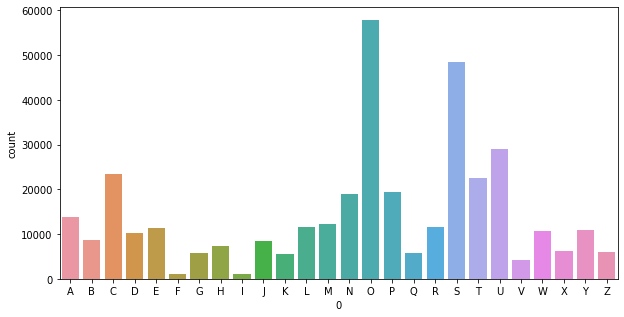

In [58]:
# Looking for imbalances in data
plt.figure(figsize = (10,5))
sns.countplot(x)

In [59]:
nM = NearMiss()
X_data, y_data = nM.fit_resample(df, y)

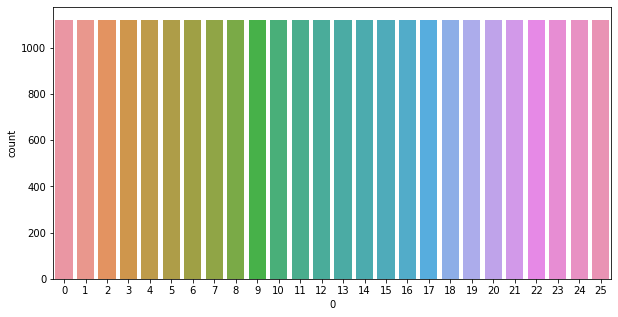

In [60]:
plt.figure(figsize = (10,5))
sns.countplot(y_data)

In [61]:
#One-Hot-Encoding of the target.
y = np_utils.to_categorical(y_data)
# Define the classification of 26 alphabets.
num_classes = y.shape[1]
num_classes

26

In [62]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [63]:
y.shape , X_data.shape


((29120, 26), (29120, 784))

In [64]:
X_data = X_data / 255
X_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_data = np.array(X_data)
X_data = X_data.reshape(-1,28,28,1)
# Showing few images

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(6):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

: 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2 ,random_state=102)


In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23296, 28, 28, 1), (5824, 28, 28, 1), (23296, 26), (5824, 26))

In [50]:
# !kaggle datasets download sachinpatel21/az-handwritten-alphabets-in-csv-format


 87% 160M/185M [00:01<00:00, 146MB/s]
100% 185M/185M [00:01<00:00, 153MB/s]


In [45]:
# !mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [47]:
# !cp kaggle.json ~/.kaggle/

In [48]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [107]:
#Build an ordinary "Deep Learning" model with CNN and maxpooling by using Keras.
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#Choose an optimizer and compile the model.
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#And print the summary of the model.
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               589952    
                                                                 
 dense_7 (Dense)             (None, 26)                3354      
                                                                 
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
________________________________________________

In [108]:
history = model.fit(X_train,y_train,epochs=50, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/50
182/182 [==============================] - 14s 76ms/step - loss: 0.4408 - accuracy: 0.8755 - val_loss: 0.1478 - val_accuracy: 0.9586
Epoch 2/50
182/182 [==============================] - 14s 76ms/step - loss: 0.1122 - accuracy: 0.9654 - val_loss: 0.1201 - val_accuracy: 0.9681
Epoch 3/50
182/182 [==============================] - 14s 76ms/step - loss: 0.0631 - accuracy: 0.9809 - val_loss: 0.1039 - val_accuracy: 0.9744
Epoch 4/50
182/182 [==============================] - 15s 83ms/step - loss: 0.0425 - accuracy: 0.9863 - val_loss: 0.1139 - val_accuracy: 0.9718
Epoch 5/50
182/182 [==============================] - 14s 77ms/step - loss: 0.0407 - accuracy: 0.9879 - val_loss: 0.1150 - val_accuracy: 0.9736
Epoch 6/50
182/182 [==============================] - 14s 78ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.1237 - val_accuracy: 0.9758
Epoch 7/50
182/182 [==============================] - 14s 78ms/step - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.1405 - val_accuracy:

In [109]:
# Final evaluation of the model
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.73%


In [110]:
model.save("model50epoach.h5")

Input Image


In [ ]:
from PIL import Image
img = Image.open("Figure_1.png").convert('L').resize((28, 28), Image.ANTIALIAS)
img = np.array(img)
x =model.predict(img[None,:,:])

: 

In [ ]:
print(x)

: 